<br>
<br>

### LYRICS MOOD CLASSIFICATION

<br>
<br>

<br>
<br>

### Reading the dataset

In [5]:
import pandas as pd

df = pd.read_csv('../../dataset/training/train_lyrics_1000.csv')

df.head()

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


### Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

X_train = df['lyrics'].values 

y_train = df['mood'].values

print('before: %s ...' %y_train[:5])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print('after: %s ...' %y_train[:5])

before: ['sad' 'happy' 'sad' 'happy' 'sad'] ...
after: [1 0 1 0 1] ...


In [7]:
# Save object to disk

import pickle

pickle_out = open('./lyrics_label_encoder_py1.pkl', 'wb')
pickle.dump(le, pickle_out)
pickle_out.close()

<br>
<br>

## Feature extraction: Word counts and Vectorizers

<br>
<br>

### Porter Stemmer

In [8]:
# Porter Stemmer

import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()

def porter_tokenizer(text, stemmer=porter_stemmer):
    """
    A Porter-Stemmer-Tokenizer hybrid to splits sentences into words (tokens) 
    and applies the porter stemming algorithm to each of the obtained token. 
    Tokens that are only consisting of punctuation characters are removed as well.
    Only tokens that consist of more than one letter are being kept.
    
    Parameters
    ----------
        
    text : `str`. 
      A sentence that is to split into words.
        
    Returns
    ----------
    
    no_punct : `str`. 
      A list of tokens after stemming and removing Sentence punctuation patterns.
    
    """
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct


#### Test

In [9]:
porter_tokenizer("Don't !!! --- want swimming. ")

['don', 't', 'want', 'swim']

<br>
<br>

### Stop word list

In [10]:

    
with open('./stopwords_eng.txt', 'r') as infile:
    stop_words = infile.read().splitlines()
print('stop words %s ...' %stop_words[:5])

stop words ['i', 'me', 'my', 'myself', 'we'] ...


<br>
<br>

### Count Vectorizer

In [11]:
# Count Vectorizer
#Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer,
            ngram_range=(1,1)
    )


#### Test 1

In [12]:
vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn`t"]

vec = vec.fit(vocab)

sentence1 = vec.transform([u'The swimmer likes swimming.'])
sentence2 = vec.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['didn', 'like', 'swim', 'swimmer']
Sentence 1: [[0 1 1 1]]
Sentence 2: [[0 0 1 1]]


#### Fitting the lyrics

In [13]:
vec = vec.fit(X_train.ravel())

In [14]:
print('Vocabulary size: %s' %len(vec.get_feature_names()))

Vocabulary size: 8550


#### Test 2 (N-grams = 2)

In [15]:
vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer,
            ngram_range=(2,2)
    )

vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn`t"]

vec = vec.fit(vocab)

sentence1 = vec.transform([u'The swimmer likes swimming.'])
sentence2 = vec.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['like swim', 'swim didn', 'swim swim', 'swimmer like']
Sentence 1: [[1 0 0 1]]
Sentence 2: [[0 0 0 0]]


<br>
<br>

### Tfidf Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer
    )

#### Test

In [17]:
vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn`t"]

tfidf = tfidf.fit(vocab)

sentence1 = tfidf.transform([u'The swimmer likes swimming.'])
sentence2 = tfidf.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %tfidf.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['didn', 'like', 'swim', 'swimmer']
Sentence 1: [[0.         0.57735027 0.57735027 0.57735027]]
Sentence 2: [[0.         0.         0.70710678 0.70710678]]


#### Fitting the lyrics

In [18]:
tfidf = tfidf.fit(X_train.ravel())

print('Vocabulary size: %s' %len(tfidf.get_feature_names()))

Vocabulary size: 8550


# Model Selection

#### Models: Multivariate Bernoulli and Multinomial naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

#### Performance metric: F1-score

In [20]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

#### Grid Search

In [21]:
from sklearn.grid_search import GridSearchCV
from pprint import pprint

pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BernoulliNB())
])

parameters_1 = dict(
    vect__binary=[True],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
print("parameters:")
pprint(parameters_1, depth=2)
grid_search_1.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

C:\Users\MIRTUNJAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\MIRTUNJAY\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [True],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x000001F1D75A5950>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  9.8min finished


Best score: 0.617
Best parameters set:
	vect__binary: True
	vect__ngram_range: (1, 1)
	vect__stop_words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 

In [22]:
from sklearn.grid_search import GridSearchCV

pipeline_3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

parameters_3 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_3 = GridSearchCV(pipeline_3, 
                           parameters_3, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_3.steps])
print("parameters:")
pprint(parameters_3, depth=2)
grid_search_3.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_3.best_score_)
print("Best parameters set:")
best_parameters_3 = grid_search_3.best_estimator_.get_params()
for param_name in sorted(parameters_3.keys()):
    print("\t%s: %r" % (param_name, best_parameters_3[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x000001F1D75A5950>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  9.1min finished


Best score: 0.620
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',

In [19]:
from sklearn.grid_search import GridSearchCV

pipeline_4 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

parameters_4 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_4 = GridSearchCV(pipeline_4, 
                           parameters_4, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_4.steps])
print("parameters:")
pprint(parameters_4, depth=2)
grid_search_4.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_4.best_score_)
print("Best parameters set:")
best_parameters_4 = grid_search_4.best_estimator_.get_params()
for param_name in sorted(parameters_4.keys()):
    print("\t%s: %r" % (param_name, best_parameters_4[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x0000011E4110EBF8>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 11.4min finished


Best score: 0.335
Best parameters set:
	vect__binary: False
	vect__ngram_range: (2, 2)
	vect__stop_words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',

# Validation

In [23]:
final_clf = Pipeline([
                ('vect', TfidfVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=porter_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', MultinomialNB(alpha=1.0)),
               ])
final_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...se_idf=True, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [61]:
proba =max(final_clf.predict_proba(X_valid)[0])

In [53]:
X_valid[1]

"Where, oh, where have you been, my love?\nWhere, oh, where can you be?\nIt's been so long since the moon has gone\nAnd, oh, what a wreck you've made me\n\nAre you there over the ocean?\nAre you there up in the sky?\nUntil the return of my love\nThis lullaby\n\nMy hope is on the horizon\nEvery face, your eyes I can see\nI plead and I pray through each night and day\nOur embrace is only a dream\n\nAnd as sure as days come from moments\nEach hour becomes a life's time\nWhen she'd left I'd only begun\nThis lullaby"

In [64]:
label = final_clf.predict(X_valid)[0]
print("the prediction of lyrics at position 1 is "+le.inverse_transform(label)+" with the probability of "+str(proba))

the prediction of lyrics at position 1 is sad with the probability of 0.7092180010988367


C:\Users\MIRTUNJAY\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
X_valid[2]

"When it happened \nsomething snapped inside \nmade me want to hide \nall alone on my own \nall alone on my own \nI stood up on the stand \nwith my eyes shut tight \ndidn't want to see anbody \nfeeling happy\nhaving a good time, now hey \ndoing alright doing alright, \ndoing alright doing alright\n\nLooked hard into the dancing crowd \nfelt like screaming out loud \nI saw you standing in there \nI saw your long \nsaw your long hair\nopened up my eyes, baby \nyou made me\nrealize all I want to do \nall I want to do now, girl \nis look at you looking at you baby,\nlook at you, looking at you baby \nyeah, yeah, hey \n\nLooked hard into the dancing crowd \nI felt like screaming out loud\nall I wanna do all I wanna do\nall I want to do\nis look at you looking at you, baby\nlook at you, looking at you baby\nlooking at you looking \nat you looking at you, baby \nyou baby you baby you baby, yeah"

In [58]:
final_clf.predict(X_valid)[2]

0

<br>
<br>

### Confusion matrix

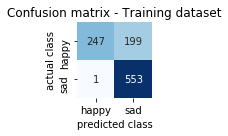

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cm = metrics.confusion_matrix(y_train, final_clf.predict(X_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
#plt.savefig('./images/confmat_training11.eps', dpi=300)
plt.show()

In [27]:
df = pd.read_csv('../../dataset/validation/valid_lyrics_200.csv')

X_valid = df['lyrics'].values 
y_valid = df['mood'].values

y_valid = le.transform(y_valid)

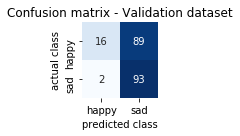

In [28]:
cm = metrics.confusion_matrix(y_valid, final_clf.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
#plt.savefig('./images/confmat_valid1.eps', dpi=300)
plt.show()

<br>
<br>

### Accuracy, Precision, Recall, and F1-score

In [29]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)

In [30]:
d = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
     'ROC AUC (%)':[],
}

In [31]:
d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['ROC AUC (%)'].append(auc_scorer(estimator=final_clf, X=X_train, y_true=y_train))

d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['ROC AUC (%)'].append(auc_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))

In [32]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)', 'ROC AUC (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%),ROC AUC (%)
Training,80.0,99.60,55.38,71.18,77.60
Validation,54.5,88.89,15.24,26.02,56.57


In [33]:
df_perform.to_csv('./clf_performance1x.csv', index_label=False)

In [69]:
def classify(document):

    x_vect = vec.transform([document])
    proba = np.max(final_clf.predict_proba(x_vect))
    pred = final_clf.predict(x_vect)[0]
    label = le.inverse_transform(pred)
    return label, proba

<br>
<br>